In [12]:
import pandas as pd
dfo = pd.read_csv("flights2.csv.gz", low_memory=False)
print(dfo.columns)
dfo.head()

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
'''
createa a multiindex on destination airport and airline
the sort_index() function will sort the indices with will 
speed up subsequent searches.
'''
df = dfo.set_index(["DESTINATION_AIRPORT", "AIRLINE"]).sort_index()
df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
ABE                 DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
ABE                 DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
ABE                 DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  

[5 rows x 29 columns]

### Selecting Data in a MultiIndex

In [4]:
"""
old way (slow) using masks or the original (unindexed ds)
"""
df_old = dfo[(dfo.AIRLINE == "AA") & (dfo.DESTINATION_AIRPORT == "LAX")]
df_old.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
443,2015,1,1,4,AA,1361,N3KYAA,BNA,LAX,610,...,847.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
808,2015,1,1,4,AA,2401,N858AA,DFW,LAX,655,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
867,2015,1,1,4,AA,9,N792AA,JFK,LAX,700,...,1026.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
871,2015,1,1,4,AA,201,N3LJAA,BOS,LAX,700,...,1045.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
880,2015,1,1,4,AA,1529,N5DHAA,MCO,LAX,700,...,926.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
'''
Using the xs (cross section) function on the multiindexed ds

much facter
'''
df_new = df.xs(("LAX", "AA"))
df_new

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
LAX                 AA       2015      1    1            4           1361   
                    AA       2015      1    1            4           2401   
                    AA       2015      1    1            4              9   
                    AA       2015      1    1            4            201   
                    AA       2015      1    1            4           1529   
...                           ...    ...  ...          ...            ...   
                    AA       2015      1   31            6            298   
                    AA       2015      1   31            6           2491   
                    AA       2015      1   31            6            246   
                    AA       2015      1   31            6             14   
                    AA       2015      1   31            6            286   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
LAX                 AA           N3KYAA            BNA                  610   
                    AA           N858AA            DFW                  655   
                    AA           N792AA            JFK                  700   
                    AA           N3LJAA            BOS                  700   
                    AA           N5DHAA            MCO                  700   
...                                 ...            ...                  ...   
                    AA           N5ECAA            HNL                 2204   
                    AA           N3EVAA            DFW                 2225   
                    AA           N5DEAA            KOA                 2236   
                    AA           N5FBAA            OGG                 2300   
                    AA           N5DFAA            LIH                 2314   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
LAX                 AA                607.0             -3.0  ...   
                    AA                  NaN              NaN  ...   
                    AA                649.0            -11.0  ...   
                    AA                653.0             -7.0  ...   
                    AA                658.0             -2.0  ...   
...                                     ...              ...  ...   
                    AA               2159.0             -5.0  ...   
                    AA               2221.0             -4.0  ...   
                    AA               2216.0            -20.0  ...   
                    AA               2253.0             -7.0  ...   
                    AA               2258.0            -16.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
LAX                 AA              847.0           -8.0         0          0   
                    AA                NaN            NaN         0          1   
                    AA             1026.0            6.0         0          0   
                    AA             1045.0           10.0         0          0   
                    AA              926.0           -9.0         0          0   
...                                   ...            ...       ...        ...   
                    AA              519.0           -1.0         0          0   
                    AA             2329.0          -20.0         0          0   
                    AA              512.0          -28.0         0          0   
                    AA              533.0          -31.0         0          0   
                    AA              555.0          -39.0         0          0   

                             CANCELLATION_REASO

In [10]:
df.loc[("LAX", "AA")]

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
LAX                 AA       2015      1    1            4           1361   
                    AA       2015      1    1            4           2401   
                    AA       2015      1    1            4              9   
                    AA       2015      1    1            4            201   
                    AA       2015      1    1            4           1529   
...                           ...    ...  ...          ...            ...   
                    AA       2015      1   31            6            298   
                    AA       2015      1   31            6           2491   
                    AA       2015      1   31            6            246   
                    AA       2015      1   31            6             14   
                    AA       2015      1   31            6            286   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
LAX                 AA           N3KYAA            BNA                  610   
                    AA           N858AA            DFW                  655   
                    AA           N792AA            JFK                  700   
                    AA           N3LJAA            BOS                  700   
                    AA           N5DHAA            MCO                  700   
...                                 ...            ...                  ...   
                    AA           N5ECAA            HNL                 2204   
                    AA           N3EVAA            DFW                 2225   
                    AA           N5DEAA            KOA                 2236   
                    AA           N5FBAA            OGG                 2300   
                    AA           N5DFAA            LIH                 2314   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
LAX                 AA                607.0             -3.0  ...   
                    AA                  NaN              NaN  ...   
                    AA                649.0            -11.0  ...   
                    AA                653.0             -7.0  ...   
                    AA                658.0             -2.0  ...   
...                                     ...              ...  ...   
                    AA               2159.0             -5.0  ...   
                    AA               2221.0             -4.0  ...   
                    AA               2216.0            -20.0  ...   
                    AA               2253.0             -7.0  ...   
                    AA               2258.0            -16.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
LAX                 AA              847.0           -8.0         0          0   
                    AA                NaN            NaN         0          1   
                    AA             1026.0            6.0         0          0   
                    AA             1045.0           10.0         0          0   
                    AA              926.0           -9.0         0          0   
...                                   ...            ...       ...        ...   
                    AA              519.0           -1.0         0          0   
                    AA             2329.0          -20.0         0          0   
                    AA              512.0          -28.0         0          0   
                    AA              533.0          -31.0         0          0   
                    AA              555.0          -39.0         0          0   

                             CANCELLATION_REASO

In [18]:
'''
Filtering on a series
'''
df.FLIGHT_NUMBER["LAX", "AA"]

(LAX, AA)    1361
(LAX, AA)    2401
(LAX, AA)       9
(LAX, AA)     201
(LAX, AA)    1529
             ... 
(LAX, AA)     298
(LAX, AA)    2491
(LAX, AA)     246
(LAX, AA)      14
(LAX, AA)     286
Name: FLIGHT_NUMBER, Length: 2633, dtype: int64

In [27]:
'''
Slice on the first index.  All airport codes falling lexically
between EEE and FFF
'''

df_int = df.loc["EEE":"FFF"]
df_int.head(1000)

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
EGE                 AA       2015      1    1            4            903   
                    AA       2015      1    1            4           1196   
                    AA       2015      1    1            4           1495   
                    AA       2015      1    1            4           1080   
                    AA       2015      1    1            4            937   
...                           ...    ...  ...          ...            ...   
ELP                 OO       2015      1   16            5           5237   
                    OO       2015      1   16            5           5545   
                    OO       2015      1   17            6           2701   
                    OO       2015      1   17            6           2618   
                    OO       2015      1   17            6           5545   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
EGE                 AA           N017AA            LAX                  830   
                    AA           N5EHAA            MIA                  915   
                    AA           N5EKAA            DFW                 1140   
                    AA           N005AA            ORD                 1145   
                    AA           N009AA            DFW                 1600   
...                                 ...            ...                  ...   
ELP                 OO           N796SK            IAH                 1438   
                    OO           N970SW            DEN                 1940   
                    OO           N899SK            PHX                  955   
                    OO           N464SW            LAX                 1400   
                    OO           N910SW            DEN                 1510   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
EGE                 AA                823.0             -7.0  ...   
                    AA                913.0             -2.0  ...   
                    AA               1253.0             73.0  ...   
                    AA                  NaN              NaN  ...   
                    AA               1635.0             35.0  ...   
...                                     ...              ...  ...   
ELP                 OO               1428.0            -10.0  ...   
                    OO               1941.0              1.0  ...   
                    OO                950.0             -5.0  ...   
                    OO               1355.0             -5.0  ...   
                    OO               1507.0             -3.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
EGE                 AA             1201.0           16.0         0          0   
                    AA             1147.0          -11.0         0          0   
                    AA             1357.0           57.0         0          0   
                    AA                NaN            NaN         0          1   
                    AA             1737.0           17.0         0          0   
...                                   ...            ...       ...        ...   
ELP                 OO             1533.0           -8.0         0          0   
                    OO             2125.0            5.0         0          0   
                    OO             1113.0           -4.0         0          0   
                    OO             1646.0            2.0         0          0   
                    OO             1656.0           -2.0         0          0   

                             CANCELLATION_REASO

In [35]:
'''
Slice first two indices using tuple notation
'''
df_int = df.loc[("EAA", "AA"):("EZZ","ZZ")]
df_int.head(1000)

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
EAU                 OO       2015      1    1            4           5455   
                    OO       2015      1    1            4           5410   
                    OO       2015      1    2            5           5455   
                    OO       2015      1    2            5           5410   
                    OO       2015      1    3            6           5455   
...                           ...    ...  ...          ...            ...   
ELP                 EV       2015      1    1            4           4526   
                    EV       2015      1    1            4           6098   
                    EV       2015      1    1            4           4281   
                    EV       2015      1    1            4           4363   
                    EV       2015      1    1            4           5968   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
EAU                 OO           N929EV            ORD                 1310   
                    OO           N984CA            ORD                 2115   
                    OO           N929SW            ORD                 1310   
                    OO           N908SW            ORD                 2115   
                    OO           N908SW            ORD                 1310   
...                                 ...            ...                  ...   
ELP                 EV           N13161            IAH                 1433   
                    EV           N17159            DEN                 1510   
                    EV           N11548            IAH                 1736   
                    EV           N13994            IAH                 2105   
                    EV           N11109            DEN                 2157   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
EAU                 OO               1257.0            -13.0  ...   
                    OO               2107.0             -8.0  ...   
                    OO               1300.0            -10.0  ...   
                    OO               2106.0             -9.0  ...   
                    OO               1647.0            217.0  ...   
...                                     ...              ...  ...   
ELP                 EV               1430.0             -3.0  ...   
                    EV               1905.0            235.0  ...   
                    EV               1742.0              6.0  ...   
                    EV               2104.0             -1.0  ...   
                    EV               2246.0             49.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
EAU                 OO             1415.0          -12.0         0          0   
                    OO             2215.0          -10.0         0          0   
                    OO             1428.0            1.0         0          0   
                    OO             2221.0           -4.0         0          0   
                    OO             1801.0          214.0         0          0   
...                                   ...            ...       ...        ...   
ELP                 EV             1530.0           -9.0         0          0   
                    EV             2112.0          254.0         0          0   
                    EV             1850.0            8.0         0          0   
                    EV             2209.0            1.0         0          0   
                    EV                NaN            NaN         0          1   

                             CANCELLATION_REASO

In [36]:
'''
Slice of every airport destination but only AA airline

The colon is illegal which is why we need to replace with slice(None)
df_int.loc[:, "AA"), :]

'''

df_int.loc[(slice(None), "AA"), :]

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
EGE                 AA       2015      1    1            4            903   
                    AA       2015      1    1            4           1196   
                    AA       2015      1    1            4           1495   
                    AA       2015      1    1            4           1080   
                    AA       2015      1    1            4            937   
...                           ...    ...  ...          ...            ...   
EWR                 AA       2015      1   31            6           1224   
                    AA       2015      1   31            6           1280   
                    AA       2015      1   31            6           1598   
                    AA       2015      1   31            6           1502   
                    AA       2015      1   31            6           2322   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
EGE                 AA           N017AA            LAX                  830   
                    AA           N5EHAA            MIA                  915   
                    AA           N5EKAA            DFW                 1140   
                    AA           N005AA            ORD                 1145   
                    AA           N009AA            DFW                 1600   
...                                 ...            ...                  ...   
EWR                 AA           N3FBAA            DFW                 1335   
                    AA           N3CLAA            PHX                 1340   
                    AA           N3FAAA            MIA                 1529   
                    AA           N3DNAA            MIA                 1825   
                    AA           N3GFAA            MIA                 2105   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
EGE                 AA                823.0             -7.0  ...   
                    AA                913.0             -2.0  ...   
                    AA               1253.0             73.0  ...   
                    AA                  NaN              NaN  ...   
                    AA               1635.0             35.0  ...   
...                                     ...              ...  ...   
EWR                 AA               1331.0             -4.0  ...   
                    AA               1341.0              1.0  ...   
                    AA               1525.0             -4.0  ...   
                    AA               1824.0             -1.0  ...   
                    AA               2103.0             -2.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
EGE                 AA             1201.0           16.0         0          0   
                    AA             1147.0          -11.0         0          0   
                    AA             1357.0           57.0         0          0   
                    AA                NaN            NaN         0          1   
                    AA             1737.0           17.0         0          0   
...                                   ...            ...       ...        ...   
EWR                 AA             1739.0           -8.0         0          0   
                    AA             2002.0          -14.0         0          0   
                    AA             1817.0          -12.0         0          0   
                    AA             2125.0            3.0         0          0   
                    AA               17.0           22.0         0          0   

                             CANCELLATION_REASO

In [57]:
'''
using the index object syntax 
'''
idx = pd.IndexSlice
# df_int.loc[idx[:, "AA"], :]  #Slice of every airport destination but only AA airline
df_int.loc[idx["EEE":"FFF", "L":"N"], :] #All airports EEE-FFF, and all airlines L-N



YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ELP                 MQ       2015      1    1            4           3094   
                    MQ       2015      1    1            4           3113   
                    MQ       2015      1    2            5           3094   
                    MQ       2015      1    2            5           3113   
                    MQ       2015      1    3            6           3094   
...                           ...    ...  ...          ...            ...   
EYW                 MQ       2015      1   30            5           3592   
                    MQ       2015      1   30            5           3545   
                    MQ       2015      1   31            6           3397   
                    MQ       2015      1   31            6           3592   
                    MQ       2015      1   31            6           3545   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ELP                 MQ           N508MQ            ORD                 1025   
                    MQ           N508MQ            ORD                 2155   
                    MQ           N519MQ            ORD                 1025   
                    MQ           N519MQ            ORD                 2155   
                    MQ           N507MQ            ORD                 1025   
...                                 ...            ...                  ...   
EYW                 MQ           N942MQ            MIA                 1310   
                    MQ           N619MQ            MIA                 1640   
                    MQ           N675MQ            MIA                  920   
                    MQ           N619MQ            MIA                 1310   
                    MQ           N608MQ            MIA                 1640   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ELP                 MQ               1052.0             27.0  ...   
                    MQ               2158.0              3.0  ...   
                    MQ               1053.0             28.0  ...   
                    MQ               2155.0              0.0  ...   
                    MQ               1030.0              5.0  ...   
...                                     ...              ...  ...   
EYW                 MQ               1303.0             -7.0  ...   
                    MQ               1634.0             -6.0  ...   
                    MQ                924.0              4.0  ...   
                    MQ               1305.0             -5.0  ...   
                    MQ               1636.0             -4.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ELP                 MQ             1327.0           44.0         0          0   
                    MQ               44.0           36.0         0          0   
                    MQ             1319.0           36.0         0          0   
                    MQ               22.0           14.0         0          0   
                    MQ             1246.0            3.0         0          0   
...                                   ...            ...       ...        ...   
EYW                 MQ             1346.0          -13.0         0          0   
                    MQ             1716.0          -17.0         0          0   
                    MQ             1017.0            3.0         0          0   
                    MQ             1402.0            3.0         0          0   
                    MQ             1731.0           -2.0         0          0   

                             CANCELLATION_REASO

### Constructing Multiindexes

In [61]:
#Using set_index()
df = dfo.set_index(["DESTINATION_AIRPORT", "AIRLINE"])
df.sort_index()
df.index # note that index is named

MultiIndex([('SEA', 'AS'),
            ('PBI', 'AA'),
            ('CLT', 'US'),
            ('MIA', 'AA'),
            ('ANC', 'AS'),
            ('MSP', 'DL'),
            ('MSP', 'NK'),
            ('CLT', 'US'),
            ('DFW', 'AA'),
            ('ATL', 'DL'),
            ...
            ('SFO', 'UA'),
            ('JFK', 'B6'),
            ('MSP', 'US'),
            ('MCO', 'B6'),
            ('PSE', 'B6'),
            ('BQN', 'B6'),
            ('DTW', 'DL'),
            ('TPA', 'F9'),
            ('ATL', 'F9'),
            ('DEN', 'UA')],
           names=['DESTINATION_AIRPORT', 'AIRLINE'], length=469968)

In [63]:
'''
From numpy arrays
'''
airlines = dfo.AIRLINE.to_numpy()
dests = dfo.DESTINATION_AIRPORT.to_numpy()
display(airlines, dests)

pd.MultiIndex.from_arrays([airlines, dests]) # Note that index is not named

array(['AS', 'AA', 'US', ..., 'F9', 'F9', 'UA'], dtype=object)

array(['SEA', 'PBI', 'CLT', ..., 'TPA', 'ATL', 'DEN'], dtype=object)

MultiIndex([('AS', 'SEA'),
            ('AA', 'PBI'),
            ('US', 'CLT'),
            ('AA', 'MIA'),
            ('AS', 'ANC'),
            ('DL', 'MSP'),
            ('NK', 'MSP'),
            ('US', 'CLT'),
            ('AA', 'DFW'),
            ('DL', 'ATL'),
            ...
            ('UA', 'SFO'),
            ('B6', 'JFK'),
            ('US', 'MSP'),
            ('B6', 'MCO'),
            ('B6', 'PSE'),
            ('B6', 'BQN'),
            ('DL', 'DTW'),
            ('F9', 'TPA'),
            ('F9', 'ATL'),
            ('UA', 'DEN')],
           length=469968)

In [73]:
'''
From a list of tuples
'''
tups = [tuple(x) for x in 
       dfo[["DESTINATION_AIRPORT", "AIRLINE"]][:10].to_numpy()]

dfo[["DESTINATION_AIRPORT", "AIRLINE"]][:10].to_numpy()

tuple(['SEA', 'AS'])


('SEA', 'AS')

In [65]:
tups

[('SEA', 'AS'),
 ('PBI', 'AA'),
 ('CLT', 'US'),
 ('MIA', 'AA'),
 ('ANC', 'AS'),
 ('MSP', 'DL'),
 ('MSP', 'NK'),
 ('CLT', 'US'),
 ('DFW', 'AA'),
 ('ATL', 'DL')]

In [74]:
pd.MultiIndex.from_tuples(tups)

MultiIndex([('SEA', 'AS'),
            ('PBI', 'AA'),
            ('CLT', 'US'),
            ('MIA', 'AA'),
            ('ANC', 'AS'),
            ('MSP', 'DL'),
            ('MSP', 'NK'),
            ('CLT', 'US'),
            ('DFW', 'AA'),
            ('ATL', 'DL')],
           )

In [77]:
'''
From Cross Product (cartesian outer)
1 x 2 x 3 = 12 final rows

also demonstrating how to set column names

'''

idx = pd.MultiIndex.from_product([
                           [1,2,3], 
                           [2000, 2001], 
                           ["Sem 1", "Sem 2"]
])

idx.names = ["Student", "Year", "Sem"]

idx

MultiIndex([(1, 2000, 'Sem 1'),
            (1, 2000, 'Sem 2'),
            (1, 2001, 'Sem 1'),
            (1, 2001, 'Sem 2'),
            (2, 2000, 'Sem 1'),
            (2, 2000, 'Sem 2'),
            (2, 2001, 'Sem 1'),
            (2, 2001, 'Sem 2'),
            (3, 2000, 'Sem 1'),
            (3, 2000, 'Sem 2'),
            (3, 2001, 'Sem 1'),
            (3, 2001, 'Sem 2')],
           names=['Student', 'Year', 'Sem'])

### MultiIndex Columns


In [82]:
data =[[1.1,40,.9,30], [1.2,45,1.05,40], 
        [1.3,65,1.3,55], [1.5,80,1.6,75]
      ]

columns = pd.MultiIndex.from_product([["Jack", "Jill"], ["Height", "Age"]])
rows = pd.to_datetime(["2000-01-01","2001-01-01","2002-01-01","2003-01-01"])
df2 = pd.DataFrame(data, columns = columns).set_index(rows)
df2.transpose()

Jack       Jill    
           Height Age Height Age
2000-01-01    1.1  40   0.90  30
2001-01-01    1.2  45   1.05  40
2002-01-01    1.3  65   1.30  55
2003-01-01    1.5  80   1.60  75

In [86]:
'''
All values for Jack
'''
df2["Jack"]

,Height,Age
2000-01-01,1.1,40
2001-01-01,1.2,45
2002-01-01,1.3,65
2003-01-01,1.5,80


In [84]:
'''
All height values for Jack
'''
df2.loc[:,("Jack", "Height")]

2000-01-01    1.1
2001-01-01    1.2
2002-01-01    1.3
2003-01-01    1.5
Name: (Jack, Height), dtype: float64

In [87]:
'''
using IndexSlice to get only Height for all top
level indices (i.e., Jack and Jill)
'''
idx = pd.IndexSlice
df2.loc[:, idx[:, "Height"]]

,Jack,Jill
,Height,Height
2000-01-01,1.1,0.90
2001-01-01,1.2,1.05
2002-01-01,1.3,1.30
2003-01-01,1.5,1.60


In [88]:
'''
Another way now using the xs function
'''
df2.xs("Height", level=1, axis=1) 

,Jack,Jill
2000-01-01,1.1,0.90
2001-01-01,1.2,1.05
2002-01-01,1.3,1.30
2003-01-01,1.5,1.60


In [93]:
'''
Demonstrate another way to acccess by adding 
index column level names and using them in xs
'''
df2.columns.names = ["Name", "Info"] # Level 1/Level 2 aliases
df2.xs("Height", level="Info", axis=1) 

Name,Jack,Jill
2000-01-01,1.1,0.90
2001-01-01,1.2,1.05
2002-01-01,1.3,1.30
2003-01-01,1.5,1.60


### Stacking and Unstacking

In [121]:
'''
load data and set a 2 column multiindex
'''

dfo = pd.read_csv("train.csv", low_memory=False)
dfo.dropna()
df = dfo.set_index(["Store", "Date"])
df = df.sort_index()
df.head()

DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Store Date                                                                
1     2013-01-01          2      0          0     0      0            a   
      2013-01-02          3   5530        668     1      0            0   
      2013-01-03          4   4327        578     1      0            0   
      2013-01-04          5   4486        619     1      0            0   
      2013-01-05          6   4997        635     1      0            0   

                  SchoolHoliday  
Store Date                       
1     2013-01-01              1  
      2013-01-02              1  
      2013-01-03              1  
      2013-01-04              1  
      2013-01-05              1

DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Store Date                                                                
1     2013-01-01          2      0          0     0      0            a   
      2013-01-02          3   5530        668     1      0            0   
      2013-01-03          4   4327        578     1      0            0   
      2013-01-04          5   4486        619     1      0            0   
      2013-01-05          6   4997        635     1      0            0   

                  SchoolHoliday  
Store Date                       
1     2013-01-01              1  
      2013-01-02              1  
      2013-01-03              1  
      2013-01-04              1  
      2013-01-05              1

In [132]:
'''
Unstack the Sales Column

Unstacking will move from long format to wide format
Takes the second component of the index (in this case the date)
and turns it into columns

1115 Stores, 942 dates
'''
unstacked_sales = df.Sales.unstack()
unstacked_sales

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31
Store,,,,,,,,,,,,,,,,,,,,,
1,0.0,5530.0,4327.0,4486.0,4997.0,0.0,7176.0,5580.0,5471.0,4892.0,...,3464.0,3769.0,3706.0,4364.0,0.0,6102.0,5011.0,4782.0,5020.0,5263.0
2,0.0,4422.0,4159.0,4484.0,2342.0,0.0,6775.0,6318.0,6763.0,5618.0,...,5093.0,4108.0,3854.0,2512.0,0.0,6627.0,5671.0,6402.0,5567.0,6064.0
3,0.0,6823.0,5902.0,6069.0,4523.0,0.0,12247.0,9800.0,8001.0,7772.0,...,5414.0,5702.0,5080.0,3878.0,0.0,8107.0,8864.0,7610.0,8977.0,8314.0
4,0.0,9941.0,8247.0,8290.0,10338.0,0.0,12112.0,10031.0,8857.0,9472.0,...,8503.0,7286.0,8322.0,9322.0,0.0,11812.0,10275.0,10514.0,10387.0,13995.0
5,0.0,4253.0,3465.0,4456.0,1590.0,0.0,6978.0,5718.0,5974.0,4999.0,...,3595.0,3713.0,3815.0,2030.0,0.0,7059.0,6083.0,5899.0,4943.0,4822.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0.0,5097.0,4579.0,4640.0,3325.0,0.0,9444.0,6472.0,5307.0,5887.0,...,4021.0,3587.0,3918.0,2177.0,0.0,7742.0,6793.0,4907.0,5263.0,5723.0
1112,0.0,10797.0,8716.0,9788.0,9513.0,0.0,25165.0,17058.0,14724.0,14366.0,...,6029.0,6730.0,6220.0,6216.0,0.0,14383.0,9583.0,9179.0,9652.0,9626.0
1113,0.0,6218.0,5563.0,5524.0,5194.0,0.0,8984.0,6866.0,6115.0,7508.0,...,4565.0,6410.0,6399.0,4784.0,0.0,7582.0,6468.0,6640.0,7491.0,7289.0


In [134]:
'''
Can also specify the level to unstack, in this case
there are 1115 stores and 942 dates so unpacking the Store index 
gives us 1115 columns and 945 rows
'''
unstacked_stores = df.Sales.unstack(level="Store")
unstacked_stores

Store,1,2,3,4,5,6,7,8,9,10,...,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,5530.0,4422.0,6823.0,9941.0,4253.0,6089.0,8244.0,5419.0,4903.0,4812.0,...,5099.0,3955.0,6220.0,4576.0,4126.0,5097.0,10797.0,6218.0,20642.0,3697.0
2013-01-03,4327.0,4159.0,5902.0,8247.0,3465.0,5398.0,7231.0,4842.0,4602.0,4675.0,...,4330.0,3151.0,4779.0,3654.0,3508.0,4579.0,8716.0,5563.0,18463.0,4297.0
2013-01-04,4486.0,4484.0,6069.0,8290.0,4456.0,6092.0,7758.0,4059.0,4798.0,5114.0,...,3956.0,3990.0,5491.0,3596.0,3933.0,4640.0,9788.0,5524.0,18371.0,4540.0
2013-01-05,4997.0,2342.0,4523.0,10338.0,1590.0,3872.0,5218.0,2337.0,4254.0,4256.0,...,2624.0,5128.0,2113.0,2897.0,3156.0,3325.0,9513.0,5194.0,18856.0,4771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,6102.0,6627.0,8107.0,11812.0,7059.0,5723.0,14869.0,8739.0,10649.0,7212.0,...,7042.0,11221.0,10717.0,8082.0,6761.0,7742.0,14383.0,7582.0,26720.0,10712.0
2015-07-28,5011.0,5671.0,8864.0,10275.0,6083.0,4839.0,12342.0,6717.0,8751.0,6140.0,...,6037.0,9533.0,8211.0,6478.0,5282.0,6793.0,9583.0,6468.0,25518.0,8093.0
2015-07-29,4782.0,6402.0,7610.0,10514.0,5899.0,5275.0,12074.0,7029.0,7776.0,5524.0,...,5536.0,8168.0,6302.0,6212.0,4600.0,4907.0,9179.0,6640.0,25840.0,7661.0


In [136]:
'''
Create a three level index
'''

df2 = dfo.set_index(["Store", "Date", "Open"])
df2 = df2.sort_index()
df2

DayOfWeek  Sales  Customers  Promo StateHoliday  \
Store Date       Open                                                    
1     2013-01-01 0             2      0          0      0            a   
      2013-01-02 1             3   5530        668      0            0   
      2013-01-03 1             4   4327        578      0            0   
      2013-01-04 1             5   4486        619      0            0   
      2013-01-05 1             6   4997        635      0            0   
...                          ...    ...        ...    ...          ...   
1115  2015-07-27 1             1  10712        608      1            0   
      2015-07-28 1             2   8093        500      1            0   
      2015-07-29 1             3   7661        473      1            0   
      2015-07-30 1             4   8405        502      1            0   
      2015-07-31 1             5   8680        538      1            0   

                       SchoolHoliday  
Store Date       Open                 
1     2013-01-01 0                 1  
      2013-01-02 1                 1  
      2013-01-03 1                 1  
      2013-01-04 1                 1  
      2013-01-05 1                 1  
...                              ...  
1115  2015-07-27 1                 1  
      2015-07-28 1                 1  
      2015-07-29 1                 1  
      2015-07-30 1                 1  
      2015-07-31 1                 1  

[1017209 rows x 6 columns]

In [140]:
'''
Declare the level (Open would be default anyhow since its the
last defined column)
'''
df2.Customers.unstack(level="Open")

Open                0      1
Store Date                  
1     2013-01-01  0.0    NaN
      2013-01-02  NaN  668.0
      2013-01-03  NaN  578.0
      2013-01-04  NaN  619.0
      2013-01-05  NaN  635.0
...               ...    ...
1115  2015-07-27  NaN  608.0
      2015-07-28  NaN  500.0
      2015-07-29  NaN  473.0
      2015-07-30  NaN  502.0
      2015-07-31  NaN  538.0

[1017209 rows x 2 columns]

In [144]:
'''
Syntax to unstack multiple levels
'''
df2.Customers.unstack(["Store", "Open"])

Store      1           2           3           4            5            ...  \
Open          0      1    0      1    0      1    0       1    0      1  ...   
Date                                                                     ...   
2013-01-01  0.0    NaN  0.0    NaN  0.0    NaN  0.0     NaN  0.0    NaN  ...   
2013-01-02  NaN  668.0  NaN  650.0  NaN  805.0  NaN  1429.0  NaN  577.0  ...   
2013-01-03  NaN  578.0  NaN  555.0  NaN  721.0  NaN  1248.0  NaN  491.0  ...   
2013-01-04  NaN  619.0  NaN  574.0  NaN  690.0  NaN  1232.0  NaN  533.0  ...   
2013-01-05  NaN  635.0  NaN  324.0  NaN  525.0  NaN  1514.0  NaN  202.0  ...   
...         ...    ...  ...    ...  ...    ...  ...     ...  ...    ...  ...   
2015-07-27  NaN  612.0  NaN  638.0  NaN  768.0  NaN  1379.0  NaN  650.0  ...   
2015-07-28  NaN  560.0  NaN  646.0  NaN  818.0  NaN  1191.0  NaN  598.0  ...   
2015-07-29  NaN  523.0  NaN  727.0  NaN  716.0  NaN  1258.0  NaN  658.0  ...   
2015-07-30  NaN  546.0  NaN  601.0  NaN  823.0  NaN  1276.0  NaN  539.0  ...   
2015-07-31  NaN  555.0  NaN  625.0  NaN  821.0  NaN  1498.0  NaN  559.0  ...   

Store      1111        1112        1113        1114         1115         
Open          0      1    0      1    0      1    0       1    0      1  
Date                                                                     
2013-01-01  0.0    NaN  0.0    NaN  0.0    NaN  0.0     NaN  0.0    NaN  
2013-01-02  NaN  505.0  NaN  892.0  NaN  753.0  NaN  3401.0  NaN  305.0  
2013-01-03  NaN  444.0  NaN  809.0  NaN  718.0  NaN  3211.0  NaN  300.0  
2013-01-04  NaN  453.0  NaN  861.0  NaN  646.0  NaN  3036.0  NaN  326.0  
2013-01-05  NaN  291.0  NaN  856.0  NaN  569.0  NaN  3065.0  NaN  339.0  
...         ...    ...  ...    ...  ...    ...  ...     ...  ...    ...  
2015-07-27  NaN  515.0  NaN  946.0  NaN  684.0  NaN  3468.0  NaN  608.0  
2015-07-28  NaN  493.0  NaN  713.0  NaN  584.0  NaN  3456.0  NaN  500.0  
2015-07-29  NaN  403.0  NaN  709.0  NaN  589.0  NaN  3545.0  NaN  473.0  
2015-07-30  NaN  439.0  NaN  728.0  NaN  716.0  NaN  3251.0  NaN  502.0  
2015-07-31  NaN  422.0  NaN  767.0  NaN  720.0  NaN  3745.0  NaN  538.0  

[942 rows x 2220 columns]

In [149]:
tmp = df2.Customers.unstack(["Store", "Open"])

In [150]:
tmp.columns


MultiIndex([(   1, 0),
            (   1, 1),
            (   2, 0),
            (   2, 1),
            (   3, 0),
            (   3, 1),
            (   4, 0),
            (   4, 1),
            (   5, 0),
            (   5, 1),
            ...
            (1111, 0),
            (1111, 1),
            (1112, 0),
            (1112, 1),
            (1113, 0),
            (1113, 1),
            (1114, 0),
            (1114, 1),
            (1115, 0),
            (1115, 1)],
           names=['Store', 'Open'], length=2220)

In [148]:
tmp.stack()
tmp

Store      1           2           3           4            5            ...  \
Open          0      1    0      1    0      1    0       1    0      1  ...   
Date                                                                     ...   
2013-01-01  0.0    NaN  0.0    NaN  0.0    NaN  0.0     NaN  0.0    NaN  ...   
2013-01-02  NaN  668.0  NaN  650.0  NaN  805.0  NaN  1429.0  NaN  577.0  ...   
2013-01-03  NaN  578.0  NaN  555.0  NaN  721.0  NaN  1248.0  NaN  491.0  ...   
2013-01-04  NaN  619.0  NaN  574.0  NaN  690.0  NaN  1232.0  NaN  533.0  ...   
2013-01-05  NaN  635.0  NaN  324.0  NaN  525.0  NaN  1514.0  NaN  202.0  ...   
...         ...    ...  ...    ...  ...    ...  ...     ...  ...    ...  ...   
2015-07-27  NaN  612.0  NaN  638.0  NaN  768.0  NaN  1379.0  NaN  650.0  ...   
2015-07-28  NaN  560.0  NaN  646.0  NaN  818.0  NaN  1191.0  NaN  598.0  ...   
2015-07-29  NaN  523.0  NaN  727.0  NaN  716.0  NaN  1258.0  NaN  658.0  ...   
2015-07-30  NaN  546.0  NaN  601.0  NaN  823.0  NaN  1276.0  NaN  539.0  ...   
2015-07-31  NaN  555.0  NaN  625.0  NaN  821.0  NaN  1498.0  NaN  559.0  ...   

Store      1111        1112        1113        1114         1115         
Open          0      1    0      1    0      1    0       1    0      1  
Date                                                                     
2013-01-01  0.0    NaN  0.0    NaN  0.0    NaN  0.0     NaN  0.0    NaN  
2013-01-02  NaN  505.0  NaN  892.0  NaN  753.0  NaN  3401.0  NaN  305.0  
2013-01-03  NaN  444.0  NaN  809.0  NaN  718.0  NaN  3211.0  NaN  300.0  
2013-01-04  NaN  453.0  NaN  861.0  NaN  646.0  NaN  3036.0  NaN  326.0  
2013-01-05  NaN  291.0  NaN  856.0  NaN  569.0  NaN  3065.0  NaN  339.0  
...         ...    ...  ...    ...  ...    ...  ...     ...  ...    ...  
2015-07-27  NaN  515.0  NaN  946.0  NaN  684.0  NaN  3468.0  NaN  608.0  
2015-07-28  NaN  493.0  NaN  713.0  NaN  584.0  NaN  3456.0  NaN  500.0  
2015-07-29  NaN  403.0  NaN  709.0  NaN  589.0  NaN  3545.0  NaN  473.0  
2015-07-30  NaN  439.0  NaN  728.0  NaN  716.0  NaN  3251.0  NaN  502.0  
2015-07-31  NaN  422.0  NaN  767.0  NaN  720.0  NaN  3745.0  NaN  538.0  

[942 rows x 2220 columns]

In [156]:
'''
plot of yearly trend over stores
'''

x = dfo.set_index(["Store", "Date"])[["Sales"]]
x

,,Sales
Store,Date,
1,2015-07-31,5263
2,2015-07-31,6064
3,2015-07-31,8314
4,2015-07-31,13995
5,2015-07-31,4822
...,...,...
1111,2013-01-01,0
1112,2013-01-01,0
1113,2013-01-01,0


In [159]:
x2 = x.unstack()
x2

Sales                                                         \
Date  2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06   
Store                                                                     
1            0.0     5530.0     4327.0     4486.0     4997.0        0.0   
2            0.0     4422.0     4159.0     4484.0     2342.0        0.0   
3            0.0     6823.0     5902.0     6069.0     4523.0        0.0   
4            0.0     9941.0     8247.0     8290.0    10338.0        0.0   
5            0.0     4253.0     3465.0     4456.0     1590.0        0.0   
...          ...        ...        ...        ...        ...        ...   
1111         0.0     5097.0     4579.0     4640.0     3325.0        0.0   
1112         0.0    10797.0     8716.0     9788.0     9513.0        0.0   
1113         0.0     6218.0     5563.0     5524.0     5194.0        0.0   
1114         0.0    20642.0    18463.0    18371.0    18856.0        0.0   
1115         0.0     3697.0     4297.0     4540.0     4771.0        0.0   

                                                   ...                        \
Date  2013-01-07 2013-01-08 2013-01-09 2013-01-10  ... 2015-07-22 2015-07-23   
Store                                              ...                         
1         7176.0     5580.0     5471.0     4892.0  ...     3464.0     3769.0   
2         6775.0     6318.0     6763.0     5618.0  ...     5093.0     4108.0   
3        12247.0     9800.0     8001.0     7772.0  ...     5414.0     5702.0   
4        12112.0    10031.0     8857.0     9472.0  ...     8503.0     7286.0   
5         6978.0     5718.0     5974.0     4999.0  ...     3595.0     3713.0   
...          ...        ...        ...        ...  ...        ...        ...   
1111      9444.0     6472.0     5307.0     5887.0  ...     4021.0     3587.0   
1112     25165.0    17058.0    14724.0    14366.0  ...     6029.0     6730.0   
1113      8984.0     6866.0     6115.0     7508.0  ...     4565.0     6410.0   
1114     21237.0    18816.0    17073.0    18075.0  ...    20424.0    20564.0   
1115      6905.0     5243.0     4649.0     5007.0  ...     5342.0     6150.0   

                                                                         \
Date  2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28 2015-07-29   
Store                                                                     
1         3706.0     4364.0        0.0     6102.0     5011.0     4782.0   
2         3854.0     2512.0        0.0     6627.0     5671.0     6402.0   
3         5080.0     3878.0        0.0     8107.0     8864.0     7610.0   
4         8322.0     9322.0        0.0    11812.0    10275.0    10514.0   
5         3815.0     2030.0        0.0     7059.0     6083.0     5899.0   
...          ...        ...        ...        ...        ...        ...   
1111      3918.0     2177.0        0.0     7742.0     6793.0     4907.0   
1112      6220.0     6216.0        0.0    14383.0     9583.0     9179.0   
1113      6399.0     4784.0        0.0     7582.0     6468.0     6640.0   
1114     19627.0    21312.0        0.0    26720.0    25518.0    25840.0   
1115      5816.0     6897.0        0.0    10712.0     8093.0     7661.0   

                             
Date  2015-07-30 2015-07-31  
Store                        
1         5020.0     5263.0  
2         5567.0     6064.0  
3         8977.0     8314.0  
4        10387.0    13995.0  
5         4943.0     4822.0  
...          ...        ...  
1111      5263.0     5723.0  
1112      9652.0     9626.0  
1113      7491.0     7289.0  
1114     24395.0    27508.0  
1115      8405.0     8680.0  

[1115 rows x 942 columns]

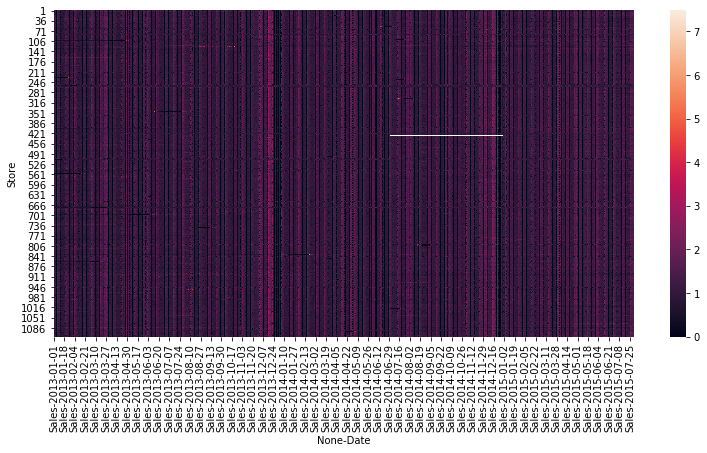

In [164]:
import seaborn as sb
import matplotlib.pyplot as plt
means = x2.mean(axis=1)
x_norm = x2.div(means, axis=0)
fig, ax = plt.subplots(figsize=(13,6))
sb.heatmap(data=x_norm, ax=ax)

### Pivoting

In [185]:

dfo = pd.read_csv("pres16results.csv")
dfo.head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [186]:
'''
We want to extract a series
containing the top candidates by votes
and then filter dfo the series as a mask
'''
top = dfo.loc[dfo.fips == "US", ["cand", "votes"]].sort_values("votes", ascending=False)
candidates = top.cand.head()
display(top, type(candidates))
df = dfo[dfo.cand.isin(candidates)]
df

,cand,votes
1,Hillary Clinton,60981118.0
0,Donald Trump,60350241.0
2,Gary Johnson,4164589.0
3,Jill Stein,1255968.0
4,Evan McMullin,451636.0
5,Darrell Castle,180877.0
6,Gloria La Riva,48308.0
7,Rocky De La Fuente,32120.0
8,None of these candidates,28824.0
9,Richard Duncan,23501.0


pandas.core.series.Series

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump
...,...,...,...,...,...,...,...,...,...
18346,King County,48269,Jill Stein,TX,1.0000,0.0,159.0,0.000000,Donald Trump
18347,Loving County,48301,Donald Trump,TX,1.0000,57.0,64.0,0.890625,Donald Trump
18348,Loving County,48301,Hillary Clinton,TX,1.0000,4.0,64.0,0.062500,Donald Trump
18349,Loving County,48301,Jill Stein,TX,1.0000,2.0,64.0,0.031250,Donald Trump


,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump
...,...,...,...,...,...,...,...,...,...
18346,King County,48269,Jill Stein,TX,1.0000,0.0,159.0,0.000000,Donald Trump
18347,Loving County,48301,Donald Trump,TX,1.0000,57.0,64.0,0.890625,Donald Trump
18348,Loving County,48301,Hillary Clinton,TX,1.0000,4.0,64.0,0.062500,Donald Trump
18349,Loving County,48301,Jill Stein,TX,1.0000,2.0,64.0,0.031250,Donald Trump


In [190]:
p = df.pivot(index="fips", columns="cand", values="votes")
p

# below accomplishes the same thing
df.set_index(["fips","cand"]).votes.unstack()

cand,Donald Trump,Evan McMullin,Gary Johnson,Hillary Clinton,Jill Stein
fips,,,,,
10001,36989.0,NaN,2876.0,33347.0,1041.0
10003,85507.0,NaN,9101.0,162905.0,3955.0
10005,62607.0,NaN,2774.0,39329.0,1104.0
1001,18110.0,NaN,538.0,5908.0,105.0
1003,72780.0,NaN,2448.0,18409.0,453.0
...,...,...,...,...,...
VT,95053.0,NaN,10047.0,178179.0,6748.0
WA,1043648.0,NaN,131779.0,1523720.0,46016.0
WI,1409467.0,NaN,106442.0,1382210.0,30980.0


### Pivot Table

In [210]:
'''
Going to use the world happiness index files but 
they are split by year...following technique merges them!
'''

data =[pd.read_csv(f"{year}.csv").assign(Year=year) for year in range(2015,2020)]
for d in data:
    print(d.Year[0], d.columns)

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social supp

In [263]:
'''
Need to clean up data... we will use Country, Score, Year, and
GDP per capita columns

BUT...we need to rename them first
'''

renames = {
    "Country or region": "Country",
    "Happiness Score": "Score",
    "Happiness.Score": "Score",
    "Economy..GDP.per.Capita": "GDP per capita",
    "Economy..GDP.per.Capita": "GDP per capita",
    "Economy (GDP per Capita)": "GDP per capita",
    "GDP per capita": "GDP per capita",
    "Economy..GDP.per.Capita.": "GDP per capita"
}

keep = ["Country", "Score", "Year", "GDP per capita"]

# data
data_prepped = [d.rename(columns=renames).loc[:,keep] for d in data]
#data_prepped = [d.rename(columns=renames) for d in data]
data_prepped 

[         Country  Score  Year  GDP per capita
 0    Switzerland  7.587  2015         1.39651
 1        Iceland  7.561  2015         1.30232
 2        Denmark  7.527  2015         1.32548
 3         Norway  7.522  2015         1.45900
 4         Canada  7.427  2015         1.32629
 ..           ...    ...   ...             ...
 153       Rwanda  3.465  2015         0.22208
 154        Benin  3.340  2015         0.28665
 155        Syria  3.006  2015         0.66320
 156      Burundi  2.905  2015         0.01530
 157         Togo  2.839  2015         0.20868
 
 [158 rows x 4 columns],
          Country  Score  Year  GDP per capita
 0        Denmark  7.526  2016         1.44178
 1    Switzerland  7.509  2016         1.52733
 2        Iceland  7.501  2016         1.42666
 3         Norway  7.498  2016         1.57744
 4        Finland  7.413  2016         1.40598
 ..           ...    ...   ...             ...
 152        Benin  3.484  2016         0.39499
 153  Afghanistan  3.360  2016   

In [277]:
'''
now merge all the rows into 1 df
'''
df = pd.concat(data_prepped, sort=False).reset_index(drop=True)

'''
new technique for displaying more!
'''
# with pd.option_context('display.max_rows', 1000, 'display.max.columns', 100):
#    display(df)

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
display(df)

,Country,Score,Year,GDP per capita
0,Switzerland,7.587,2015,1.396510
1,Iceland,7.561,2015,1.302320
2,Denmark,7.527,2015,1.325480
3,Norway,7.522,2015,1.459000
4,Canada,7.427,2015,1.326290
5,Finland,7.406,2015,1.290250
6,Netherlands,7.378,2015,1.329440
7,Sweden,7.364,2015,1.331710
8,New Zealand,7.286,2015,1.250180
9,Australia,7.284,2015,1.333580


In [278]:
'''
save the cleaned up ds for later
'''
df.to_csv("happiness.csv", index=False, float_format="%0.3f")

In [282]:
'''
calculates the mean of the score for each country
'''
#df.pivot_table(index="Country", values="Score")

#this is equivalent
df.groupby("Country").Score.mean().to_frame()

,Score
Country,
Afghanistan,3.512800
Albania,4.712600
Algeria,5.667600
Angola,3.872250
Argentina,6.459400
Armenia,4.393200
Australia,7.276200
Austria,7.142000
Azerbaijan,5.229200


In [288]:
'''
A more sophisticated example that calcualtes several statistics
'''
import numpy as np
df.pivot_table(index="Country", values="Score", aggfunc=[np.mean, np.std, np.median])

,mean,std,median
,Score,Score,Score
Afghanistan,3.512800,2.326342e-01,3.5750
Albania,4.712600,1.456067e-01,4.6550
Algeria,5.667600,4.651697e-01,5.6050
Angola,3.872250,1.122716e-01,3.8305
Argentina,6.459400,2.310169e-01,6.5740
Armenia,4.393200,9.482458e-02,4.3600
Australia,7.276200,3.089012e-02,7.2840
Austria,7.142000,9.112353e-02,7.1390
Azerbaijan,5.229200,3.668379e-02,5.2120


In [297]:
'''
More typical usage (default aggregation for each statistic is the mean)
'''
df.pivot_table(index="Country", columns="Year")



GDP per capita                                   Score                            
Year                               2015     2016      2017   2018   2019   2015   2016   2017   2018   2019
Country                                                                                                    
Afghanistan                     0.31982  0.38227  0.401477  0.332  0.350  3.575  3.360  3.794  3.632  3.203
Albania                         0.87867  0.95530  0.996193  0.916  0.947  4.959  4.655  4.644  4.586  4.719
Algeria                         0.93929  1.05266  1.091864  0.979  1.002  5.605  6.355  5.872  5.295  5.211
Angola                          0.75778  0.84731  0.858428  0.730    NaN  4.033  3.866  3.795  3.795    NaN
Argentina                       1.05351  1.15137  1.185295  1.073  1.092  6.574  6.650  6.599  6.388  6.086
Armenia                         0.76821  0.86086  0.900597  0.816  0.850  4.350  4.360  4.376  4.321  4.559
Australia                       1.33358  1.44443  1.484415  1.340  1.372  7.284  7.313  7.284  7.272  7.228
Austria                         1.33723  1.45038  1.487097  1.341  1.376  7.200  7.119  7.006  7.139  7.246
Azerbaijan                      1.02389  1.12373  1.153602  1.024  1.043  5.212  5.291  5.234  5.201  5.208
Bahrain                         1.32376  1.44024  1.488412  1.338  1.362  5.960  6.218  6.087  6.105  6.199
Bangladesh                      0.39753  0.54177  0.586683  0.532  0.562  4.694  4.643  4.608  4.500  4.456
Belarus                         1.03192  1.13062  1.156558  1.039  1.067  5.813  5.802  5.569  5.483  5.323
Belgium                         1.30782  1.42539  1.463781  1.324  1.356  6.937  6.929  6.891  6.927  6.923
Belize                              NaN  0.87616  0.907975  0.807    NaN    NaN  5.956  5.956  5.956    NaN
Benin                           0.28665  0.39499  0.431085  0.378  0.393  3.340  3.484  3.657  4.141  4.883
Bhutan                          0.77042  0.85270  0.885416  0.796  0.813  5.253  5.196  5.011  5.082  5.082
Bolivia                         0.68133  0.79422  0.833757  0.751  0.776  5.890  5.822  5.823  5.752  5.779
Bosnia and Herzegovina          0.83223  0.93383  0.982409  0.915  0.945  4.949  5.163  5.182  5.129  5.386
Botswana                        0.99355  1.09426  1.122094  1.017  1.041  4.332  3.974  3.766  3.590  3.488
Brazil                          0.98124  1.08754  1.107353  0.986  1.004  6.983  6.952  6.635  6.419  6.300
Bulgaria                        1.01216  1.11306  1.161459  1.054  1.092  4.218  4.217  4.714  4.933  5.011
Burkina Faso                    0.25812  0.31995  0.350228  0.314  0.331  3.587  3.739  4.032  4.424  4.587
Burundi                         0.01530  0.06831  0.091623  0.091  0.046  2.905  2.905  2.905  2.905  3.775
Cambodia                        0.46038  0.55604  0.601765  0.549  0.574  3.819  3.907  4.168  4.433  4.700
Cameroon                        0.42250  0.52497  0.564305  0.535  0.549  4.252  4.513  4.695  4.975  5.044
Canada                          1.32629  1.44015  1.479204  1.330  1.365  7.427  7.404  7.316  7.328  7.278
Central African Republic        0.07850      NaN  0.000000  0.024  0.026  3.678    NaN  2.693  3.083  3.083
Chad                            0.34193  0.42214  0.438013  0.358  0.350  3.667  3.763  3.936  4.301  4.350
Chile                           1.10715  1.21670  1.252785  1.131  1.159  6.670  6.705  6.652  6.476  6.444
China                           0.89012  1.02780  1.081166  0.989  1.029  5.140  5.245  5.273  5.246  5.191
Colombia                        0.91861  1.03032  1.070622  0.960  0.985  6.477  6.481  6.357  6.260  6.125
Comoros                         0.23906  0.27509       NaN    NaN  0.274  3.956  3.956    NaN    NaN  3.973
Congo (Brazzaville)             0.67866  0.77109  0.808964  0.682  0.673  3.989  4.236  4.291  4.559  4.812
Congo (Kinshasa)                0.00000  0.05661  0.092102  0.069  0.094  4.517  4.272  4.280  4.245  4.418
Costa Rica                   

In [298]:
 '''
constrain to GDP statistic and calc mean and median
'''
df.pivot_table(index="Country", columns="Year", values="GDP per capita", aggfunc=[np.mean, np.median])


mean                                    median                                 
Year                         2015     2016      2017   2018   2019     2015     2016      2017   2018   2019
Country                                                                                                     
Afghanistan               0.31982  0.38227  0.401477  0.332  0.350  0.31982  0.38227  0.401477  0.332  0.350
Albania                   0.87867  0.95530  0.996193  0.916  0.947  0.87867  0.95530  0.996193  0.916  0.947
Algeria                   0.93929  1.05266  1.091864  0.979  1.002  0.93929  1.05266  1.091864  0.979  1.002
Angola                    0.75778  0.84731  0.858428  0.730    NaN  0.75778  0.84731  0.858428  0.730    NaN
Argentina                 1.05351  1.15137  1.185295  1.073  1.092  1.05351  1.15137  1.185295  1.073  1.092
Armenia                   0.76821  0.86086  0.900597  0.816  0.850  0.76821  0.86086  0.900597  0.816  0.850
Australia                 1.33358  1.44443  1.484415  1.340  1.372  1.33358  1.44443  1.484415  1.340  1.372
Austria                   1.33723  1.45038  1.487097  1.341  1.376  1.33723  1.45038  1.487097  1.341  1.376
Azerbaijan                1.02389  1.12373  1.153602  1.024  1.043  1.02389  1.12373  1.153602  1.024  1.043
Bahrain                   1.32376  1.44024  1.488412  1.338  1.362  1.32376  1.44024  1.488412  1.338  1.362
Bangladesh                0.39753  0.54177  0.586683  0.532  0.562  0.39753  0.54177  0.586683  0.532  0.562
Belarus                   1.03192  1.13062  1.156558  1.039  1.067  1.03192  1.13062  1.156558  1.039  1.067
Belgium                   1.30782  1.42539  1.463781  1.324  1.356  1.30782  1.42539  1.463781  1.324  1.356
Belize                        NaN  0.87616  0.907975  0.807    NaN      NaN  0.87616  0.907975  0.807    NaN
Benin                     0.28665  0.39499  0.431085  0.378  0.393  0.28665  0.39499  0.431085  0.378  0.393
Bhutan                    0.77042  0.85270  0.885416  0.796  0.813  0.77042  0.85270  0.885416  0.796  0.813
Bolivia                   0.68133  0.79422  0.833757  0.751  0.776  0.68133  0.79422  0.833757  0.751  0.776
Bosnia and Herzegovina    0.83223  0.93383  0.982409  0.915  0.945  0.83223  0.93383  0.982409  0.915  0.945
Botswana                  0.99355  1.09426  1.122094  1.017  1.041  0.99355  1.09426  1.122094  1.017  1.041
Brazil                    0.98124  1.08754  1.107353  0.986  1.004  0.98124  1.08754  1.107353  0.986  1.004
Bulgaria                  1.01216  1.11306  1.161459  1.054  1.092  1.01216  1.11306  1.161459  1.054  1.092
Burkina Faso              0.25812  0.31995  0.350228  0.314  0.331  0.25812  0.31995  0.350228  0.314  0.331
Burundi                   0.01530  0.06831  0.091623  0.091  0.046  0.01530  0.06831  0.091623  0.091  0.046
Cambodia                  0.46038  0.55604  0.601765  0.549  0.574  0.46038  0.55604  0.601765  0.549  0.574
Cameroon                  0.42250  0.52497  0.564305  0.535  0.549  0.42250  0.52497  0.564305  0.535  0.549
Canada                    1.32629  1.44015  1.479204  1.330  1.365  1.32629  1.44015  1.479204  1.330  1.365
Central African Republic  0.07850      NaN  0.000000  0.024  0.026  0.07850      NaN  0.000000  0.024  0.026
Chad                      0.34193  0.42214  0.438013  0.358  0.350  0.34193  0.42214  0.438013  0.358  0.350
Chile                     1.10715  1.21670  1.252785  1.131  1.159  1.10715  1.21670  1.252785  1.131  1.159
China                     0.89012  1.02780  1.081166  0.989  1.029  0.89012  1.02780  1.081166  0.989  1.029
Colombia                  0.91861  1.03032  1.070622  0.960  0.985  0.91861  1.03032  1.070622  0.960  0.985
Comoros                   0.23906  0.27509       NaN    NaN  0.274  0.23906  0.27509       NaN    NaN  0.274
Congo (Brazzaville)       0.67866  0.77109  0.808964  0.682  0.673  0.67866  0.77109  0.808964  0.682  0.673
Congo (Kinshasa)          0.00000  0.05661  0.092102  0.069  0.094  0.00000  0.05661  0.092102  0.069  0.

In [316]:
'''
This code swaps the column multiindex levels.
sort_index will sort all the indices by year (level 0)
so that we can see all the statistic grouped by year
'''

df.pivot_table(index="Country", columns="Year").swaplevel(0,1, axis=1).sort_index(axis=1, level=0, ascending=True)

Year                               2015                  2016                  2017                  2018                  2019       
                         GDP per capita  Score GDP per capita  Score GDP per capita  Score GDP per capita  Score GDP per capita  Score
Country                                                                                                                               
Afghanistan                     0.31982  3.575        0.38227  3.360       0.401477  3.794          0.332  3.632          0.350  3.203
Albania                         0.87867  4.959        0.95530  4.655       0.996193  4.644          0.916  4.586          0.947  4.719
Algeria                         0.93929  5.605        1.05266  6.355       1.091864  5.872          0.979  5.295          1.002  5.211
Angola                          0.75778  4.033        0.84731  3.866       0.858428  3.795          0.730  3.795            NaN    NaN
Argentina                       1.05351  6.574        1.15137  6.650       1.185295  6.599          1.073  6.388          1.092  6.086
Armenia                         0.76821  4.350        0.86086  4.360       0.900597  4.376          0.816  4.321          0.850  4.559
Australia                       1.33358  7.284        1.44443  7.313       1.484415  7.284          1.340  7.272          1.372  7.228
Austria                         1.33723  7.200        1.45038  7.119       1.487097  7.006          1.341  7.139          1.376  7.246
Azerbaijan                      1.02389  5.212        1.12373  5.291       1.153602  5.234          1.024  5.201          1.043  5.208
Bahrain                         1.32376  5.960        1.44024  6.218       1.488412  6.087          1.338  6.105          1.362  6.199
Bangladesh                      0.39753  4.694        0.54177  4.643       0.586683  4.608          0.532  4.500          0.562  4.456
Belarus                         1.03192  5.813        1.13062  5.802       1.156558  5.569          1.039  5.483          1.067  5.323
Belgium                         1.30782  6.937        1.42539  6.929       1.463781  6.891          1.324  6.927          1.356  6.923
Belize                              NaN    NaN        0.87616  5.956       0.907975  5.956          0.807  5.956            NaN    NaN
Benin                           0.28665  3.340        0.39499  3.484       0.431085  3.657          0.378  4.141          0.393  4.883
Bhutan                          0.77042  5.253        0.85270  5.196       0.885416  5.011          0.796  5.082          0.813  5.082
Bolivia                         0.68133  5.890        0.79422  5.822       0.833757  5.823          0.751  5.752          0.776  5.779
Bosnia and Herzegovina          0.83223  4.949        0.93383  5.163       0.982409  5.182          0.915  5.129          0.945  5.386
Botswana                        0.99355  4.332        1.09426  3.974       1.122094  3.766          1.017  3.590          1.041  3.488
Brazil                          0.98124  6.983        1.08754  6.952       1.107353  6.635          0.986  6.419          1.004  6.300
Bulgaria                        1.01216  4.218        1.11306  4.217       1.161459  4.714          1.054  4.933          1.092  5.011
Burkina Faso                    0.25812  3.587        0.31995  3.739       0.350228  4.032          0.314  4.424          0.331  4.587
Burundi                         0.01530  2.905        0.06831  2.905       0.091623  2.905          0.091  2.905          0.046  3.775
Cambodia                        0.46038  3.819        0.55604  3.907       0.601765  4.168          0.549  4.433          0.574  4.700
Cameroon                        0.42250  4.252        0.52497  4.513       0.564305  4.695          0.535  4.975          0.549  5.044
Canada                          1.32629  7.427        1.44015  7.404       1.479204  7.316          1.330  7.328          1.365  7.278
Central African Republic        0.07850  3.678            NaN    NaN       0.000000  

### Pivot margins

In [317]:
df = pd.read_csv("happiness.csv")


,Country,Score,Year,GDP per capita
0,Switzerland,7.587,2015,1.397
1,Iceland,7.561,2015,1.302
2,Denmark,7.527,2015,1.325
3,Norway,7.522,2015,1.459
4,Canada,7.427,2015,1.326


In [330]:
'''
margins adds a column to add a calculated column

'''
df.pivot_table(index=["Country"], columns=["Year"], values="Score",
               margins=True, 
               aggfunc=np.sum,  # default fn is mean
               margins_name="Sum of All")

Year,2015,2016,2017,2018,2019,Sum of All
Country,,,,,,
Afghanistan,3.575,3.360,3.794,3.632,3.203,17.564
Albania,4.959,4.655,4.644,4.586,4.719,23.563
Algeria,5.605,6.355,5.872,5.295,5.211,28.338
Angola,4.033,3.866,3.795,3.795,NaN,15.489
Argentina,6.574,6.650,6.599,6.388,6.086,32.297
Armenia,4.350,4.360,4.376,4.321,4.559,21.966
Australia,7.284,7.313,7.284,7.272,7.228,36.381
Austria,7.200,7.119,7.006,7.139,7.246,35.710
Azerbaijan,5.212,5.291,5.234,5.201,5.208,26.146


In [374]:
'''
Create a pivot table that looks at both stats over the whole time period
calculates the mean for each as well as the average improvement year 
over year.

also demonstrates how to rename the columns

Finally drop any NaNs and sort the rows for each column
'''

res = df.pivot_table(index=["Country"],
               values=["Score", "GDP per capita"],
               margins= True, 
               aggfunc=[np.mean,  lambda x: np.mean(np.diff(x))])

res.columns = res.columns.set_levels(["mean_score", "avg_improvement"], level=0)

res = res.dropna()
res = res.sort_values(("mean_score", "GDP per capita"), ascending=True)
res

/Users/matt/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/matt/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean_score           avg_improvement          
                         GDP per capita     Score  GDP per capita     Score
Somalia                        0.005750  5.060250        0.000000 -0.257333
Central African Republic       0.032250  3.134250       -0.017667 -0.198333
Congo (Kinshasa)               0.062400  4.346400        0.023500 -0.024750
Burundi                        0.062400  3.079000        0.007750  0.217500
Liberia                        0.089200  3.839200        0.000500 -0.149000
Niger                          0.126600  4.104600        0.017250  0.195750
Malawi                         0.142600  3.883000        0.043750 -0.220500
Mozambique                     0.179750  4.601000        0.040333 -0.168333
Comoros                        0.262667  3.961667        0.017500  0.008500
Togo                           0.265800  3.544200        0.016500  0.311500
Madagascar                     0.266000  3.745400        0.016500  0.063000
Guinea                         0.273400  3.853600        0.051500  0.219500
Ethiopia                       0.293400  4.423200        0.036250 -0.056500
Burkina Faso                   0.314600  4.073800        0.018250  0.250000
Sierra Leone                   0.317400  4.559200       -0.015500 -0.033250
Uganda                         0.318600  4.020200        0.030250  0.064500
Rwanda                         0.322000  3.438600        0.034250 -0.032750
Haiti                          0.323000  3.865600        0.014000 -0.230250
Zimbabwe                       0.344000  4.006600        0.023750 -0.236750
Afghanistan                    0.357000  3.512800        0.007500 -0.093000
South Sudan                    0.358500  3.382500       -0.029333 -0.326333
Mali                           0.361000  4.219000        0.031000  0.098750
Benin                          0.376800  3.901000        0.026500  0.385750
Chad                           0.382000  4.003400        0.002000  0.170750
Nepal                          0.431400  4.812400        0.021500  0.099750
Senegal                        0.433200  4.394000        0.021250  0.194250
Tanzania                       0.439800  3.466000        0.047750 -0.137500
Lesotho                        0.464250  4.079000        0.038000 -0.365333
Tajikistan                     0.474000  5.097800        0.025750  0.170250
Myanmar                        0.474200  4.383000        0.109750  0.013250
Yemen                          0.489200  3.625800       -0.064750 -0.174250
Kenya                          0.490600  4.449400        0.036750  0.022500
Cameroon                       0.519000  4.695800        0.031750  0.198000
Bangladesh                     0.524200  4.580200        0.041000 -0.059500
Kyrgyzstan                     0.542200  5.173400        0.019250 -0.006250
Ivory Coast                    0.546600  4.273200        0.026000  0.322250
Cambodia                       0.548200  4.205400        0.028500  0.220250
Mauritania                     0.568600  4.355000        0.029000  0.013500
Zambia                         0.571600  4.584400        0.027000 -0.255500
Sudan                          0.604250  4.241750        0.028000 -0.137000
Ghana                          0.609400  4.536400        0.016250  0.090750
Honduras                       0.656400  5.240800        0.011750  0.268000
Palestinian Territories        0.656800  4.736600        0.014500 -0.004750
Pakistan                       0.667800  5.344000        0.020500  0.114750
Moldova                        0.671400  5.758600        0.022750 -0.090000
Nicaragua                      0.677200  6.027400        0.025250  0.069250
Laos                           0.688750  4.792750        0.057667 -0.026667
Syria                          0.699000  3.292200       -0.011000  0.114000
Nigeria                        0.715000  5.127400        0.010500 -0.000750
Congo (Brazzaville)            0.722800  4.377400       -0.001500  0.205750
Vietnam                        0.723400  5.154600        0.027250 -0.046250
U

In [403]:

df1 = pd.read_csv("happiness.csv")

res = df1.pivot_table(index="Country", values="GDP per capita", aggfunc=[lambda x: np.mean(np.diff(x))])

res.columns = res.columns.set_levels(["avg_improvement"], level=1)
thegoods = res[('<lambda>','avg_improvement')]

thegoods.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'], dtype='object', name='Country', length=161)

In [404]:
thegoods.to_csv('thegoods')